In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [199]:
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

In [200]:
pd.options.display.max_rows = len(train_df.columns)

In [201]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [202]:
train_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [203]:
train_df.drop(columns='Id', inplace=True)
test_df.drop(columns='Id', inplace=True)


In [204]:
train_df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

"LotFrontage" and "electrical" seems to have missing values which are really missing despite being just one of possible value

In [205]:
train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index, inplace=True)
train_df.shape

(1459, 80)

In [206]:
sorted_train = train_df.sort_values('SalePrice').reset_index(drop=True)
sorted_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
1,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
2,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900
3,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
4,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
1455,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1456,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1457,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [207]:
null_frontage_idx = sorted_train.loc[sorted_train['LotFrontage'].isnull()].index
null_frontage_idx

Int64Index([  14,   22,   38,   46,   51,   52,   70,   71,   78,  114,
            ...
            1343, 1346, 1347, 1354, 1356, 1359, 1396, 1420, 1440, 1447],
           dtype='int64', length=259)

In [208]:
# values = sorted_train.iloc[[null_frontage_idx[0]+1, null_frontage_idx[0]-1]]['LotFrontage'].to_list()
# values

In [209]:
def find_next_valid_idx(column, idx):
    valid = idx+1
    while valid < sorted_train.shape[0] and sorted_train.iloc[valid][column]=='nan':
        valid += 1
    return valid

In [210]:
find_next_valid_idx('LotFrontage', 14)

15

In [211]:
diffs = {}
for idx in null_frontage_idx:
    values = sorted_train.iloc[[idx+1, idx-1]]['LotFrontage'].to_list()
    diff = np.abs(values[0]-values[1])
    diffs[idx] = diff



In [212]:
np.mean(list(diffs.values()), where=~np.isnan(list(diffs.values())))

23.208333333333332

In [213]:
train_df['LotFrontage'].mean(), train_df['LotFrontage'].max(), train_df['LotFrontage'].min(), train_df['LotFrontage'].median() 

(70.0475, 313.0, 21.0, 69.0)

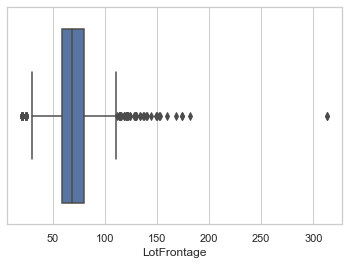

In [214]:
# fig, ax = plt.plot(figsize=(20, 12))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=train_df['LotFrontage'])

In [215]:
train_df['CentralAir'] = (train_df['CentralAir']=='No').astype(float)

In [216]:
categorical_columns = train_df.dtypes.index[train_df.dtypes=='object'].to_list()
numerical_columns = train_df.dtypes.index[train_df.dtypes!='object'].to_list()

In [217]:
len(categorical_columns), len(numerical_columns)

(42, 38)

#### Improving data

In [218]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())

In [219]:
numerical_train_values = train_df[numerical_columns]
numerical_train_values.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [220]:
nulls = numerical_train_values.isnull().sum()
null_columns_idx = np.where(nulls>0)
null_columns = numerical_train_values.columns[null_columns_idx]
null_columns

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')

In [221]:
numerical_train_values[null_columns].loc[numerical_train_values['MasVnrArea'].isna()]

,MasVnrArea,GarageYrBlt
234,NaN,2002.0
529,NaN,1975.0
650,NaN,2007.0
936,NaN,2003.0
973,NaN,2007.0
977,NaN,2007.0
1243,NaN,2006.0
1278,NaN,2002.0


In [222]:
for col in null_columns:
    numerical_train_values[col].fillna(0, inplace=True)

C:\Users\alber\AppData\Local\Temp\ipykernel_19000\1858721933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_train_values[col].fillna(0, inplace=True)


In [223]:
categorical_train_values = pd.get_dummies(train_df[categorical_columns])
categorical_train_values.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [224]:
labels = numerical_train_values['SalePrice']
numerical_train_values.drop(columns=['SalePrice'], inplace=True)
labels

C:\Users\alber\AppData\Local\Temp\ipykernel_19000\2983602439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_train_values.drop(columns=['SalePrice'], inplace=True)


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

In [225]:
numerical_train_values.shape, categorical_train_values.shape

((1459, 37), (1459, 250))

In [226]:
X = pd.concat([numerical_train_values, categorical_train_values], axis=1, join='inner')
Y = labels
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [227]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X=X, y=labels)
